<a href="https://colab.research.google.com/github/ssvadla/Sharing/blob/main/Colab_requirements.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from google.colab import drive

drive.mount('/content/drive')

train1 = pd.read_csv('/content/drive/My Drive/Research/train_data1.csv')
train2 = pd.read_csv('/content/drive/My Drive/Research/train_data2.csv')
train3 = pd.read_csv('/content/drive/My Drive/Research/train_data3.csv')
train4 = pd.read_csv('/content/drive/My Drive/Research/train_data4.csv')
train5 = pd.read_csv('/content/drive/My Drive/Research/train_data5.csv')
train6 = pd.read_csv('/content/drive/My Drive/Research/train_data6.csv')
train7 = pd.read_csv('/content/drive/My Drive/Research/train_data7.csv')
train8 = pd.read_csv('/content/drive/My Drive/Research/train_data8.csv')
train9 = pd.read_csv('/content/drive/My Drive/Research/train_data9.csv')
train10 = pd.read_csv('/content/drive/My Drive/Research/train_data10.csv')
train_highKappa = pd.read_csv('/content/drive/My Drive/Research/train_data_highkappa.csv')
train1.head()

In [ ]:
unlabel = pd.read_csv(r'/content/drive/My Drive/Research/Unlabeled_data.csv')

In [ ]:
test = pd.read_csv(r'/content/drive/My Drive/Research/test_data.csv')

In [ ]:

with open(r'/content/drive/My Drive/EM/Result.txt', 'a') as writefile:
        writefile.write("\n")
        writefile.write(" EM Results ")
        writefile.write("\n")
        writefile.write(" final dict ")
        writefile.write("\n")
        writefile.write(str(result_dict))
        writefile.write("\n")

[3 3 5 ... 1 1 1]
[3 3 5 ... 1 1 1]
Class=3, n=1601 (15.591%)
Class=5, n=472 (4.596%)
Class=2, n=3230 (31.454%)
Class=0, n=834 (8.122%)
Class=1, n=3670 (35.739%)
Class=4, n=462 (4.499%)


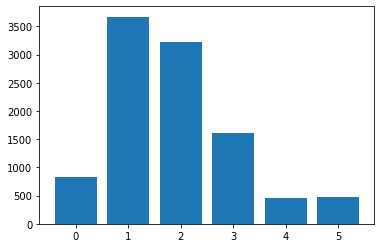

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
data = train_1.values


# split into input and output elements
X, y = data[:, :-1], data[:, -1]
# label encode the target variable
y = LabelEncoder().fit_transform(y)
print(y)
# summarize distribution
counter = Counter(y)
print(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%s, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(analyzer = clean_text)
X_tfidf = tfidf_vect.fit_transform(train_1['text'])
print(X_tfidf.shape)

(10269, 9668)


In [ ]:
X_tfidf_df=pd.DataFrame(X_tfidf.toarray())
X_tfidf_df.columns=tfidf_vect.get_feature_names()
X_tfidf_df.head()
X_tfidf_df.shape

(10269, 9668)

In [ ]:
X_tfidf_df.shape

(10269, 9668)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Class=Analysis, n=834 (9.965%)
Class=Conclusion, n=2500 (29.872%)
Class=Facts, n=2500 (29.872%)
Class=Invalid, n=1601 (19.130%)
Class=Issue, n=462 (5.520%)
Class=Rule/Law/Holding, n=472 (5.640%)


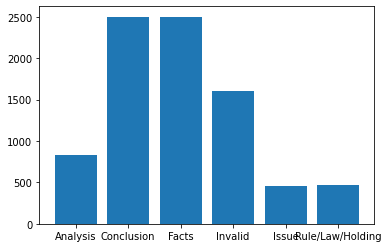

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

#undersampling_Dict={'Facts': 550, 'Invalid': 218, 'Analysis': 520, 'Rule/Law/Holding': 1000, 'Issue': 179, 'Conclusion': 240}
undersampling_Dict={ 'Facts': 2500, 'Conclusion': 2500 }
oversample = SMOTE("minority")
undersample = RandomUnderSampler(sampling_strategy=undersampling_Dict,random_state=42)
#X, y = oversample.fit_sample(X_tfidf_df, train['Target'])
X, y = undersample.fit_resample(X_tfidf_df, train_1['Target'])
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%s, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

Class=Analysis, n=2500 (16.667%)
Class=Conclusion, n=2500 (16.667%)
Class=Facts, n=2500 (16.667%)
Class=Invalid, n=2500 (16.667%)
Class=Issue, n=2500 (16.667%)
Class=Rule/Law/Holding, n=2500 (16.667%)


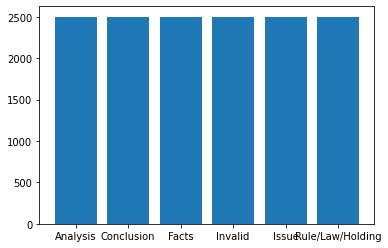

In [ ]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(random_state=777,k_neighbors=20)
X, y = oversample.fit_resample(X, y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%s, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()